# DATA EXTRACTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hrf = pd.read_csv(r"C:\Users\attah\Documents\Pandasxxx\Heart_Failure_rate\heart_failure_clinical_records_dataset.csv")

In [4]:
hrf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [16]:
tails = pd.DataFrame(hrf)

In [19]:
hrf.head(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [20]:
hrf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [21]:
hrf.shape

(299, 13)

In [22]:
hrf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


total number of living cases is 203
total number of death cases is 96


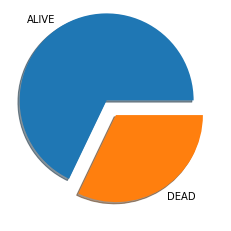

In [27]:
#checking the total number of death cases and living cases

total_death_cases = len(hrf['DEATH_EVENT'][hrf.DEATH_EVENT==1])
total_living_cases = len(hrf['DEATH_EVENT'][hrf.DEATH_EVENT==0])
arr = np.array([total_living_cases, total_death_cases])
print(f'total number of living cases is {total_living_cases}')
print(f'total number of death cases is {total_death_cases}')

labels = ['ALIVE', 'DEAD']
plt.pie(arr, explode=[0.2,0.0], shadow= True, labels = labels)
plt.show()

#As shown from the pieplot, the data is not evenly distributed
# This could lead to bias

In [38]:
#What is the total number of living cases from death cases
total_difference =total_living_cases - total_death_cases
print(f'The difference between the living and dead cases is {total_difference}')


#what is the ratio of the living to death cases
total_observations = len(hrf['DEATH_EVENT'])
death_dividend = round((total_death_cases)/(total_observations), 2)
living_dividend = round((total_living_cases)/(total_observations), 2)
 
print(f'Therefore the ratio is {living_dividend } : {death_dividend}')

The difference between the living and dead cases is 107
Therefore the ratio is 0.68 : 0.32


C:\Users\attah\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

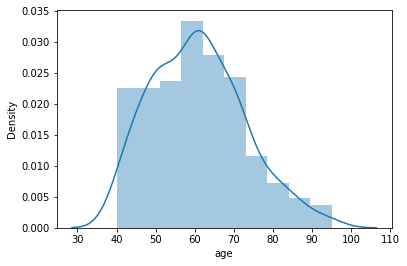

In [41]:
sns.distplot(hrf.age)

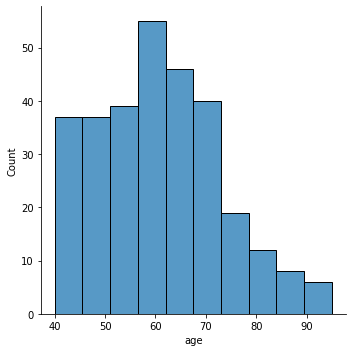

In [43]:
sns.displot(hrf.age)

The total number of with hpb but not dead is 34
The total number of with hpb but dead is 57


([<matplotlib.patches.Wedge at 0x1094c058>,
 [Text(0.5026667374535344, 1.1988853786154121, 'ABOVE_50_WITH_HPB_DEAD'),
  Text(-0.4253332982510463, -1.0144415140356227, 'ABOVE_50_WITH_HPD_NOT_DEAD')])

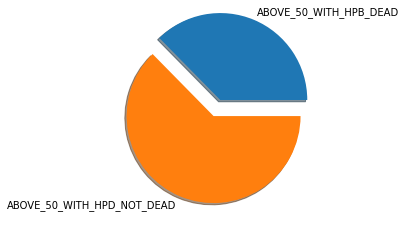

In [51]:
#Checking total number of hypertensive patients that are 50 or above that died

above_50_with_hbp_dead = len(hrf['DEATH_EVENT'][hrf.high_blood_pressure==1][hrf.age>=50][hrf.DEATH_EVENT == 1])
above_50_with_hbp_not_dead = len(hrf['DEATH_EVENT'][hrf.high_blood_pressure==1][hrf.age>=50][hrf.DEATH_EVENT == 0])

print(f'The total number of those above 50 with hpb but not dead is {above_50_with_hbp_dead}')
print(f'The total number of those above 50 with hpb but dead is {above_50_with_hbp_not_dead}')

arr = np.array([above_50_with_hbp_dead, above_50_with_hbp_not_dead])
labels = ['ABOVE_50_WITH_HPB_DEAD', 'ABOVE_50_WITH_HPD_NOT_DEAD']

plt.pie(arr, labels=labels, explode= [0.2,0.0],  shadow=True,)

The total number of those above 50 not dead is 167
The total number of those above 50 and dead is 85


([<matplotlib.patches.Wedge at 0x109b4d60>,
 [Text(-0.6359144138191262, 1.1338486928585654, 'ABOVE_50_NOT_DEAD'),
  Text(0.5380813372512318, -0.9594104827976013, 'ABOVE_50_DEAD')])

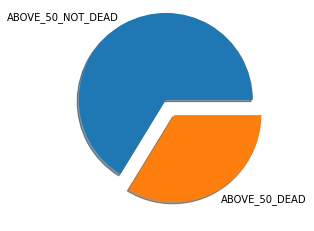

In [54]:
#getting the total number of death_events for those above the age of 50 

above_50_dead = len(hrf['DEATH_EVENT'][hrf.age>=50][hrf.DEATH_EVENT == 1])
above_50_not_dead = len(hrf['DEATH_EVENT'][hrf.age>=50][hrf.DEATH_EVENT == 0])
arr = np.array([above_50_not_dead,above_50_dead])

print(f'The total number of those above 50 not dead is {above_50_not_dead}')
print(f'The total number of those above 50 and dead is {above_50_dead}')

labels = ['ABOVE_50_NOT_DEAD', 'ABOVE_50_DEAD']

plt.pie(arr, labels=labels, explode= [0.2,0.0],  shadow=True,)

total number of diabetic patients dead 40
total number of diabetic patients not dead 85


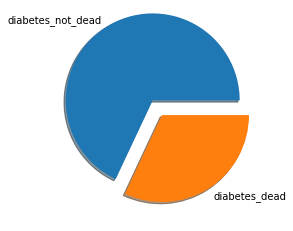

In [57]:
#Checking the number of diabetic patients that died
diabetes_dead = len(hrf['DEATH_EVENT'][hrf.diabetes==1][hrf.DEATH_EVENT==1])
diabetes_not_dead = len(hrf['DEATH_EVENT'][hrf.diabetes==1][hrf.DEATH_EVENT==0])

print(f'total number of diabetic patients dead {diabetes_dead}')
print(f'total number of diabetic patients not dead {diabetes_not_dead}')

arr = np.array([diabetes_not_dead,diabetes_dead])
labels= ["diabetes_not_dead", "diabetes_dead"]
plt.pie(arr, labels=labels, explode= [0.2,0.0], shadow=True)
plt.show()

<AxesSubplot:>

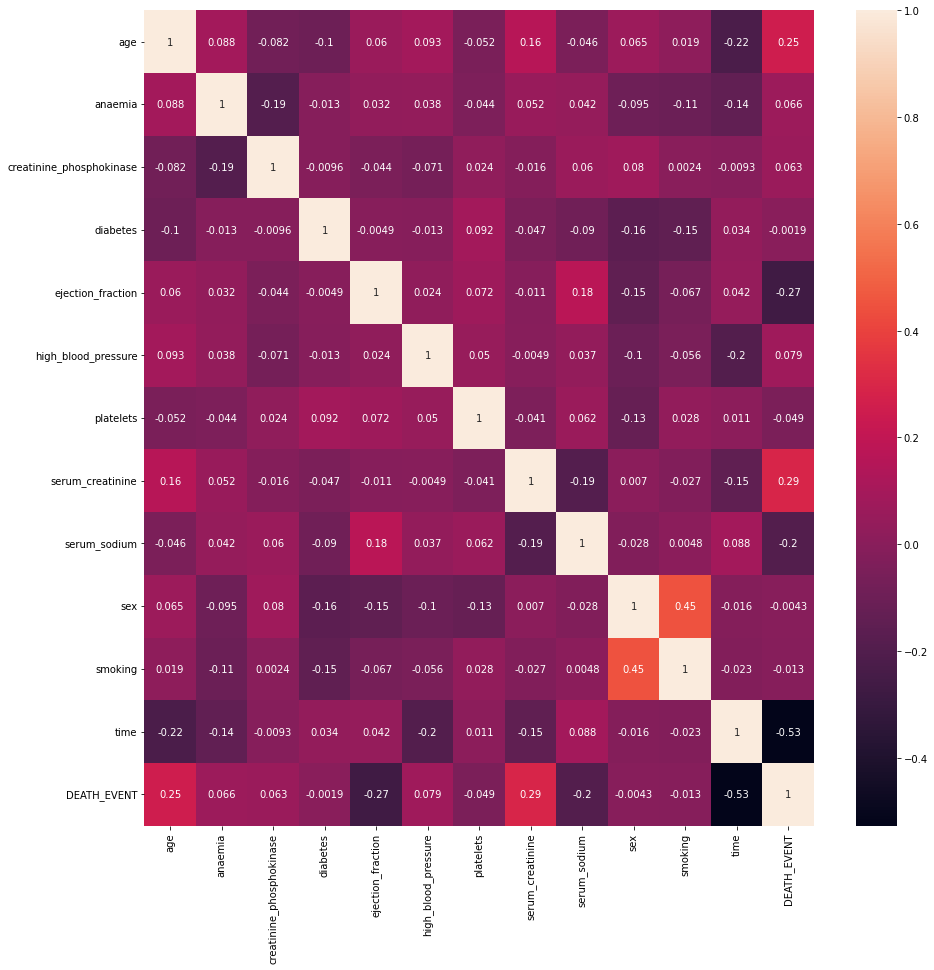

In [58]:
corr =hrf.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

# DATASET DEVELOPMENT


In [5]:
from sklearn.model_selection import train_test_split

X = hrf.drop('DEATH_EVENT', axis= 1)
y= hrf.DEATH_EVENT

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=None)

print(f'shape of X train is {X_train.shape}')
print(f'shape of X test is {X_test.shape}')
print(f'shape of y train is {y_train.shape}')
print(f'shape of y test is {y_test.shape}')

shape of X train is (209, 12)
shape of X test is (90, 12)
shape of y train is (209,)
shape of y test is (90,)


# MODEL DEVELOPMENT

In [7]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

def evaluate_model(y_test, y_pred):
    print('Accuracy score of our model is: ', accuracy_score(y_test,y_pred))
    print('Precision score of our model is: ', precision_score(y_test,y_pred))
    print('Recall score of our model is: ', recall_score(y_test,y_pred))
    print('confusion matrix of our model is:', confusion_matrix(y_test, y_pred))

In [10]:
#building with logisticregressor for a start
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
evaluate_model(y_test,y_pred)

Accuracy score of our model is:  0.8111111111111111
Precision score of our model is:  0.7692307692307693
Recall score of our model is:  0.6451612903225806
confusion matrix of our model is: [[53  6]
 [11 20]]


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
evaluate_model(y_test,y_pred)

Accuracy score of our model is:  0.7888888888888889
Precision score of our model is:  0.7142857142857143
Recall score of our model is:  0.6451612903225806
confusion matrix of our model is: [[51  8]
 [11 20]]


In [13]:
#building with support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C':[0.1,1,10,100,1000],
         'gamma':[1,0.1,0.01,0.001,0.0001],
          'kernel': ['rbf']   }

grid = GridSearchCV(SVC(), param_grid=params, verbose=3, refit=True)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [108]:
#running SVC with the best parameters

svc_clf=SVC(C=0.1, gamma=1)
svc_clf.fit(X_train,y_train)
y_pred1=svc_clf.predict(X_test)
evaluate_model(y_test,y_pred)

Accuracy score of our model is:  0.6444444444444445
Precision score of our model is:  0.0
Recall score of our model is:  0.0
confusion matrix of our model is: [[58  0]
 [32  0]]


C:\Users\attah\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.856
Test score: 0.811


DecisionTreeClassifier(criterion='entropy', max_features=0.7,
                       min_samples_leaf=0.04, min_samples_split=6,
                       random_state=2)

In [19]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_features=0.7,
                       min_samples_leaf=0.04, min_samples_split=6,
                       random_state=2)
dt_clf.fit(X_train, y_train) 
pred2 = dt_clf.predict(X_test) 
evaluate_model(y_test, pred2)

Accuracy score of our model is:  0.8111111111111111
Precision score of our model is:  0.71875
Recall score of our model is:  0.7419354838709677
confusion matrix of our model is: [[50  9]
 [ 8 23]]


In [20]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))


Training score: 0.861
Test score: 0.822


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [21]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)
rf_clf.fit(X_train,y_train)
y_pred3 = rf_clf.predict(X_test)
evaluate_model(y_test, y_pred3)

Accuracy score of our model is:  0.8222222222222222
Precision score of our model is:  0.8260869565217391
Recall score of our model is:  0.6129032258064516
confusion matrix of our model is: [[55  4]
 [12 19]]
